In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
##Import the modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
#-----------------------------------------------------##
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, Matern

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from scipy.stats import skew,kurtosis

import numpy as np

##### Coefficients and constant c0 for the model
c1 = 0.1633392287E+00
c2 = 0.6385917246E-04
c3 = -0.2889033757E+02
c0 = -0.1911288617E+01

##### Assuming df1 contains the required features:
##### 'vand_rad_Min', 'Volume', 'atom_rad_Min', 'density_Avg', 'density_Min',
##### 'atom_rad_Avg', 'vand_rad_Avg', 'cov_rad_Max', 'atom_rad_Max'

##### Calculate the descriptors
df1['d001'] = np.exp(df1['vand_rad_Min'] / df1['Volume']) * (df1['atom_rad_Min'] / (df1['density_Avg'] + df1['density_Min']))

df1['d002'] = ((df1['atom_rad_Avg']**2 - df1['atom_rad_Min'] * df1['vand_rad_Avg']) / np.log(df1['density_Min']))

df1['d003'] = np.exp(-df1['density_Avg']) / ((df1['atom_rad_Avg'] - df1['cov_rad_Max']) + (df1['atom_rad_Max'] - df1['cov_rad_Max']))

##### Calculate the target y using the formula y = c1 * d001 + c2 * d002 + c3 * d003 + c0
df1['bandgap_SISSO'] = (c1 * df1['d001']) + (c2 * df1['d002']) + (c3 * df1['d003']) + c0

In [4]:
Descriptor = pd.read_csv("ABX2_complexity5_3D.csv")
Descriptor.head(2)

,compound,BandGap,Volume,vand_rad_Avg,vand_rad_Min,vand_rad_Max,cov_rad_Avg,cov_rad_Min,cov_rad_Max,atom_rad_Avg,atom_rad_Min,atom_rad_Max,density_Avg,density_Min,density_Max,d001,d002,d003,bandgap_SISSO
0,ZnGeN2,2.44,181.39,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13,26.743211,-3767.725011,-0.017962,2.735238
1,ZnGeN2,3.02,181.83,168.33,139,211,104.33,71,122,108.33,65,135,4.42,0.81,7.13,26.693666,-3767.725011,-0.017962,2.727145


In [5]:
Descriptor.keys()

Index(['compound', 'BandGap', 'Volume', 'vand_rad_Avg', 'vand_rad_Min',
       'vand_rad_Max', 'cov_rad_Avg', 'cov_rad_Min', 'cov_rad_Max',
       'atom_rad_Avg', 'atom_rad_Min', 'atom_rad_Max', 'density_Avg',
       'density_Min', 'density_Max', 'd001', 'd002', 'd003', 'bandgap_SISSO'],
      dtype='object')

In [6]:
ML_data = Descriptor[['compound', 'BandGap','d001', 'd002', 'd003']]
ML_data.head(2)

,compound,BandGap,d001,d002,d003
0,ZnGeN2,2.44,26.743211,-3767.725011,-0.017962
1,ZnGeN2,3.02,26.693666,-3767.725011,-0.017962


In [7]:
ML_data1 = ML_data.drop(['compound'], axis=1)

# ML Model


In [8]:
ML_Balanced_Data =ML_data1.copy()
ML_Balanced_Data.head(2)

,BandGap,d001,d002,d003
0,2.44,26.743211,-3767.725011,-0.017962
1,3.02,26.693666,-3767.725011,-0.017962


In [9]:
X1 = ML_Balanced_Data.drop(['BandGap'],axis=1)
X1.head(3)

,d001,d002,d003
0,26.743211,-3767.725011,-0.017962
1,26.693666,-3767.725011,-0.017962
2,26.724029,-3767.725011,-0.017962


In [10]:
X1.shape

(92, 3)

In [11]:
Y1 = ML_Balanced_Data['BandGap']
Y1.head(3)

0    2.44
1    3.02
2    2.73
Name: BandGap, dtype: float64

In [12]:
#X = preprocessing.scale(X1)
X = X1.copy()

In [13]:
import csv
import os
from sklearn.cross_decomposition import PLSRegression
from sklearn import svm
from sklearn.svm import SVR
import xgboost as xgb

## So we are using 25 % for testing

In [14]:
for n in range (0,20,1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size =0.25, random_state=n)
        #model = Lasso(alpha= 1.000000e-08, fit_intercept= True, max_iter= 500, positive= True, precompute= False, random_state= n,selection= 'random', tol= Flase, warm_start= False)
        model = Lasso(alpha=0.00001,max_iter=100000,random_state=n,fit_intercept= True, positive= False,precompute= False,selection= 'random', tol= False, warm_start= False)
        model.fit(X_train, Y_train)
     ## ## model evaluation for training set
        from sklearn.metrics import mean_squared_error
        from sklearn.metrics import r2_score
        y_train_predict = model.predict(X_train)
        rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
        r2_train = r2_score(Y_train, y_train_predict)
        y_test_predict = model.predict(X_test)
        rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
        r2_test = r2_score(Y_test, y_test_predict)
        with open('out.csv', mode='a') as out_file:
            out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            out_writer.writerow(['%s' %n, '{}'.format(rmse_train) ,'{}'.format(r2_train), '{}'.format(rmse_test), '{}'.format(r2_test)])
            out_file.close()
from shutil import copyfile
copyfile('out.csv', 'cross-validation-out.csv')
###here we import the out.csv file and printthe statistics
data_stat=pd.read_csv('out.csv',  names = ["RMSE-Train", "$R^{2}$ train", "RMSE-test", "R$^2$ test"])
print(data_stat.describe())
#Removing out.csv file
try:
    os.remove("out.csv")
except OSError:
    pass

       RMSE-Train  $R^{2}$ train  RMSE-test  R$^2$ test
count   20.000000      20.000000  20.000000   20.000000
mean     0.313333       0.926414   0.300031    0.922584
std      0.025266       0.012307   0.078866    0.043501
min      0.262084       0.904574   0.162529    0.823417
25%      0.294616       0.914963   0.245792    0.910003
50%      0.316793       0.926033   0.298741    0.932416
75%      0.331381       0.932982   0.362804    0.952097
max      0.348470       0.947810   0.439101    0.976451


In [16]:
# RMSE-Train  $R^{2}$ train  RMSE-test  R$^2$ test
# count   20.000000      20.000000  20.000000   20.000000
# mean     0.313333       0.926414   0.300031    0.922584
# std      0.025266       0.012307   0.078866    0.043501
# min      0.262084       0.904574   0.162529    0.823417
# 25%      0.294616       0.914963   0.245792    0.910003
# 50%      0.316793       0.926033   0.298741    0.932416
# 75%      0.331381       0.932982   0.362804    0.952097
# max      0.348470       0.947810   0.439101    0.976451

In [17]:
print('Parameters currently in use:\n')
print(model.get_params())

Parameters currently in use:

{'alpha': 1e-05, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100000, 'positive': False, 'precompute': False, 'random_state': 19, 'selection': 'random', 'tol': False, 'warm_start': False}


In [18]:
print(data_stat.to_string())

    RMSE-Train  $R^{2}$ train  RMSE-test  R$^2$ test
0     0.300295       0.934880   0.345866    0.903246
1     0.282104       0.945202   0.389499    0.850095
2     0.343225       0.904574   0.210931    0.968737
3     0.289510       0.930141   0.382585    0.917744
4     0.310027       0.930977   0.324431    0.912255
5     0.278232       0.947475   0.395913    0.835538
6     0.319355       0.928950   0.289946    0.915000
7     0.321646       0.923065   0.281530    0.939425
8     0.333764       0.914754   0.243589    0.953982
9     0.327058       0.915033   0.277270    0.951469
10    0.314232       0.919615   0.320614    0.937230
11    0.313492       0.927825   0.307537    0.927601
12    0.280667       0.947810   0.390392    0.823417
13    0.343060       0.912991   0.190852    0.971077
14    0.296318       0.932349   0.356210    0.913741
15    0.330586       0.920821   0.246527    0.951385
16    0.328622       0.924241   0.258533    0.939860
17    0.348470       0.914586   0.162529    0.

###  This section of the script is for an individual random state

In [19]:
# random_state=11
n=11
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = 0.25,random_state=n)
model = Lasso(alpha=0.00001,max_iter=100000,random_state=n)
model.fit(X_train, Y_train)

Lasso(alpha=1e-05, max_iter=100000, random_state=11)

In [20]:
##### model evaluation for training set
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R$^2$ score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.3134919804647048
R$^2$ score is 0.9278245432256049


The model performance for training set  
RMSE is 0.3134919804647048  
R$^2$ score is 0.9278245432256049  

In [21]:
# model evaluation for testing set
y_test_predict = model.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R$^2$ score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 0.3075368631621574
R$^2$ score is 0.927600736020227



The model performance for testing set   
RMSE is 0.3075368631621574    
R$^2$ score is 0.927600736020227    




## We are writing results which average of 20  fold.

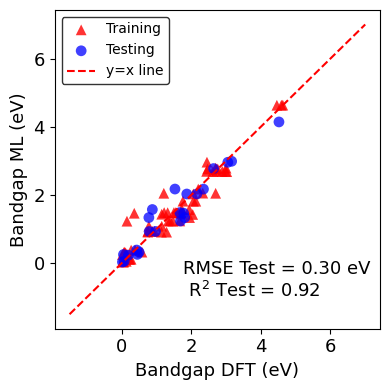

In [22]:
#### define your data plot here
plt.figure(figsize=(4,4),dpi=100)
#plt.figure(figsize=(4,4),dpi=400)
#plt.title('XgBoost', fontsize=13)
#### define your data plot here
#plt.xlim((0,3))
# plt.xticks(np.linspace(0,2,0.5,endpoint=True))
#plt.ylim((0,3))
# plt.yticks(np.linspace(0,2,0.5,endpoint=True))
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(Y_train, y_train_predict, label='Training',facecolors='red',alpha=0.8, edgecolors='none',s=60,marker='^')
plt.scatter(Y_test, y_test_predict, label='Testing',facecolors='blue',alpha=0.75, edgecolors='none',s=60, marker='o')
plt.xlabel("Bandgap DFT (eV)",fontsize=13)
plt.ylabel("Bandgap ML (eV)",fontsize=13)

#####fitting with a y=x line here (polynomial approach)
#p1 = np.polyfit(Y_train, y_train_predict,1)
plt.plot((-1.5,7),(-1.5,7), 'r',linestyle='dashed',label='y=x line')
plt.legend(loc=2, prop={'size': 13}, frameon=True)
leg = plt.legend()
leg.get_frame().set_edgecolor('black')
plt.tight_layout()
plt.text(1.75, -1, 'RMSE Test = 0.30 eV \n R$^2$ Test = 0.92',fontsize=13)
#plt.savefig ('LASSO.pdf')
plt.show()

### Reference Figure

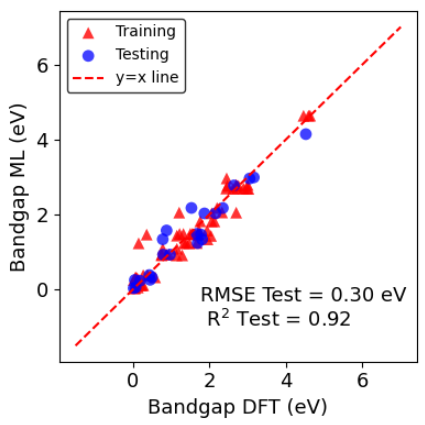

## LASSO formula

In [23]:
X

,d001,d002,d003
0,26.743211,-3767.725011,-0.017962
1,26.693666,-3767.725011,-0.017962
2,26.724029,-3767.725011,-0.017962
3,39.221053,85.236390,-0.005905
4,39.240156,85.236390,-0.005905
...,...,...,...
87,13.028835,-2746.039672,0.000101
88,13.026682,-2746.039672,0.000101
89,13.613564,-3199.156432,0.000034
90,13.612329,-3199.156432,0.000034


In [24]:
######printing coefficient of the regression
try:
#    print ("The Dual coefficients are", np.vstack(model.dual_coef_))
#    coefficient = np.vstack(model.dual_coef_)
    coefficient = model.dual_coef_
    print(coefficient)
#    print(X_1.columns.values.tolist())
    print ("The dual coefficients are written in the file 'dual_coef.txt'")
    with open('dual_coef.txt', mode='a') as out_file:
      out_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
      out_writer.writerow([X.columns.values.tolist()])
      out_writer.writerow([coefficient])
      out_file.close()
except AttributeError:
    pass
try:
#    print ("The model coefficients are {}", np.vstack(model.coef_))
#    coefficient = np.vstack(model.coef_)
    coefficient = model.coef_
except AttributeError:
    pass
try:
 #   print ("The model coefficients are", np.vstack(model.feature_importances_))
#    coefficient = np.vstack(model.feature_importances_)
    coefficient = model.feature_importances_
except AttributeError:
    pass

try:
    os.remove("co-efficient-out.txt")
except OSError:
    pass
try:
    feature={'features name': X.columns.values.tolist(),
      'coefficient':coefficient}
    df_feature=pd.DataFrame(feature)
    print(df_feature)
    df_feature.to_csv("Feature_vs_coeff.csv")
    print ("Features and their respective Coefficients are written in the file 'Feature_vs_coeff.csv'")
except:
  print ("-------------------------------------------------------------------------------------------")
  print ("-------------------------------------------------------------------------------------------")
  print ("No Coefficient(s) saved for this model")
  pass

  features name  coefficient
0          d001     0.163027
1          d002     0.000060
2          d003   -26.817969
Features and their respective Coefficients are written in the file 'Feature_vs_coeff.csv'


In [ ]:
# features name  coefficient
# 0          d001     0.163027
# 1          d002     0.000060
# 2          d003   -26.817969
# Features and their respective Coefficients are written in the file 'Feature_vs_coeff.csv'


# Hyperparameter

In [25]:
print('Parameters currently in use:\n')
print(model.get_params())

Parameters currently in use:

{'alpha': 1e-05, 'copy_X': True, 'fit_intercept': True, 'max_iter': 100000, 'positive': False, 'precompute': False, 'random_state': 11, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


In [26]:
X.keys()

Index(['d001', 'd002', 'd003'], dtype='object')

In [31]:
print(model.intercept_)

-1.9255349178651946


## Defining LASSO formula

In [28]:
ML_data = Descriptor[['compound', 'BandGap','d001', 'd002', 'd003']]
ML_data.head(2)

,compound,BandGap,d001,d002,d003
0,ZnGeN2,2.44,26.743211,-3767.725011,-0.017962
1,ZnGeN2,3.02,26.693666,-3767.725011,-0.017962


In [29]:
ML_data['LASSO_Bandgap'] = 0.16*ML_data['d001'] +0.000060*ML_data['d002']-26.82*ML_data['d003']-1.92
## We are ML_data['d002'] beacuse it is too small
#ML_data['LASSO_Bandgap'] = 0.16*ML_data['d001']+0.0001*ML_data['d002'] -26.82*ML_data['d003']-1.92
ML_data.head()

,compound,BandGap,d001,d002,d003,LASSO_Bandgap
0,ZnGeN2,2.44,26.743211,-3767.725011,-0.017962,2.614579
1,ZnGeN2,3.02,26.693666,-3767.725011,-0.017962,2.606652
2,ZnGeN2,2.73,26.724029,-3767.725011,-0.017962,2.611510
3,AlGaN2,4.59,39.221053,85.236390,-0.005905,4.518852
4,AlGaN2,4.63,39.240156,85.236390,-0.005905,4.521908


In [30]:
rmse_test = (np.sqrt(mean_squared_error(ML_data['BandGap'], ML_data['LASSO_Bandgap'])))
rmse_test = round(rmse_test,2)
r2_test = r2_score(ML_data['BandGap'], ML_data['LASSO_Bandgap'])
r2_test = round(r2_test,2)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R$^2$ score is {}'.format(r2_test))

The model performance for testing set
--------------------------------------
RMSE is 0.32
R$^2$ score is 0.92


The model performance for testing set   
RMSE is 0.32   
R$^2$ score is 0.92  